The accuracy score of the best training dataset is : 0.41657207718501704.
The accuracy score of the best testing dataset is : 0.36904761904761907.

Confusion matrix, without normalization
[[206   0  32]
 [110  16  22]
 [120   8  74]]


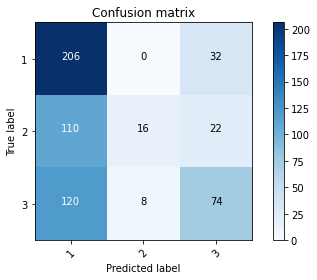

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from numpy import *
from numpy import array
from numpy import argmax

from sklearn import datasets 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer


import random

from sklearn.metrics import roc_curve, auc


def read_data(normalise, run_num):
    # Read data
    data = pd.read_csv("data.txt", delimiter=",", header=None)
    # Remove all rows with missing data, in here variable 6 has missing values
    data = data.values
    
    # N is the number of variables
    N = 10
    for i in range(N):
        data = data[ data[:,i] != '?' ]
        data = data[ data[:,i] != '$' ]
    
    # find features and target
    data_inputx = data[:,0:-1].astype(float)
    data_inputy = data[:,-1].astype(int)
    
    if normalise == True:
        # Min Max Scaler to get [0, 1]
        #scaler = StandardScaler().fit(data_inputx)
        scaler = MinMaxScaler().fit(data_inputx)
        data_inputx = scaler.transform(data_inputx)

    # create csv file with normalised inputs
    data[:,0:-1] = data_inputx
    names = ['Variable_'+str(i+1) for i in range(N)]
    df = pd.DataFrame(data, columns = names)
    #df.to_csv('file_name.csv', index = False)
    '''
    If you getUnicodeEncodeError , simply add encoding='utf-8' ;
    df.to_csv('file_name.csv', encoding='utf-8')
    '''
    
    # One Hot Encoding target 
    data_inputy = pd.get_dummies(data_inputy)
    
    #df = pd.concat([df, pd.get_dummies(df['color'], prefix='color', dummy_na=True)], axis=1)
    df = pd.concat([df[names[0:-1]], pd.get_dummies(df[names[-1]].astype(float), prefix=names[-1])], axis=1)
    df.to_csv('data3.csv', index = False)

    return data_inputx, data_inputy

def nn_adam(x_train, x_test, y_train, y_test, num):
    
    hiddens = (10,)
    learn_rate = 0.001
    alphas = 0.0001
    solver = 'adam'
    
    nn = MLPClassifier(hidden_layer_sizes=hiddens, alpha = alphas, random_state=num, max_iter=2000, solver=solver,  learning_rate_init=learn_rate)  
    nn.fit(x_train, y_train)

    y_pred_train = nn.predict(x_train)
    y_pred_test = nn.predict(x_test)
    
    acc_train = accuracy_score(y_pred_train, y_train)
    acc_test = accuracy_score(y_pred_test, y_test)
    
    return acc_train, acc_test

def nn_sgd(x_train, x_test, y_train, y_test, num):
    
    hiddens = (10,)
    learn_rate = 0.001
    alphas = 0.0001
    solver = 'sgd'
    
    nn = MLPClassifier(hidden_layer_sizes=hiddens, alpha = alphas, random_state=num, max_iter=2000, solver=solver,  learning_rate_init=learn_rate)  
    nn.fit(x_train, y_train)

    y_pred_train = nn.predict(x_train)
    y_pred_test = nn.predict(x_test)
    
    acc_train = accuracy_score(y_pred_train, y_train)
    acc_test = accuracy_score(y_pred_test, y_test)
    
    return acc_train, acc_test

def nn_L2(x_train, x_test, y_train, y_test, num, alphas):
    
    hiddens = (10,)
    learn_rate = 0.001
    solver = 'adam'
    
    nn = MLPClassifier(hidden_layer_sizes=hiddens, alpha = alphas, random_state=num, max_iter=2000, solver=solver,  learning_rate_init=learn_rate)  
    nn.fit(x_train, y_train)

    y_pred_train = nn.predict(x_train)
    y_pred_test = nn.predict(x_test)
    
    acc_train = accuracy_score(y_pred_train, y_train)
    acc_test = accuracy_score(y_pred_test, y_test)
    
    return acc_train, acc_test

    
def main():
    run_num = 0
    normalise = True
    data_inputx, data_inputy = read_data(normalise, run_num)
    
    percent_test = 0.4
    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=percent_test, random_state=run_num)

    # N is the number of experiments
    N = 1;
    
    '''
    # ADAM
    train = np.zeros((N,1))
    test = np.zeros((N,1))
    
    for i in range(N):
        train[i], test[i] = nn_adam(x_train, x_test, y_train, y_test, i)
    
    average_train = np.mean(train)#, axis = 0)
    average_test = np.mean(test)#, axis = 0)
    print("The accuracy score of training dataset with adam is : {}.".format(average_train))
    print("The accuracy score of testing dataset with adam is : {}.\n".format(average_test))
    

    # SGD
    train = np.zeros((N,1))
    test = np.zeros((N,1))
    
    for i in range(N):
        train[i], test[i] = nn_sgd(x_train, x_test, y_train, y_test, i)
    
    average_train = np.mean(train)#, axis = 0)
    average_test = np.mean(test)#, axis = 0)
    print("The accuracy score of training dataset with sgd is : {}.".format(average_train))
    print("The accuracy score of testing dataset with sgd is : {}.\n".format(average_test))
    
    # L2-Regularization
    train = np.zeros((N,1))
    test = np.zeros((N,1))
    alphas = 0.0001, 0.0005, 0.001, 0.005, 0.01
    
    for alpha in alphas:
        for i in range(N):
            train[i], test[i] = nn_L2(x_train, x_test, y_train, y_test, i, alpha)
        print("Alpha = {}".format(alpha))
        average_train = np.mean(train)#, axis = 0)
        average_test = np.mean(test)#, axis = 0)
        print("The accuracy score of training dataset is : {}.".format(average_train))
        print("The accuracy score of testing dataset is : {}.\n".format(average_test))
    '''
    
    
    # best hyper-parameter
    num = 0
    hiddens = (10,)
    learn_rate = 0.001
    alphas = 0.0005
    solver= 'adam'
    
    nn = MLPClassifier(hidden_layer_sizes=hiddens, alpha = alphas, random_state=num, max_iter=2000, solver=solver,  learning_rate_init=learn_rate)  
    nn.fit(x_train, y_train)
    y_pred_train = nn.predict(x_train)
    y_pred_test = nn.predict(x_test)
    acc_train = accuracy_score(y_pred_train, y_train)
    acc_test = accuracy_score(y_pred_test, y_test)
    print("The accuracy score of the best training dataset is : {}.".format(acc_train))
    print("The accuracy score of the best testing dataset is : {}.\n".format(acc_test))
    
    # plot confusion matrix and ROC/AUC curve
    results = confusion_matrix(np.asarray(y_test).argmax(axis=1), y_pred_test.argmax(axis=1))#, labels = [1,2])
    
    # source : https://edstem.org/au/courses/13855/lessons/41909/slides/289271
    def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        import itertools
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.savefig('cmat3.png')

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(results, classes=[1,2,3],
                          title='Confusion matrix')
    
    
    
    
    # Plot ROC, source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#one-vs-rest-multiclass-roc
    y_score = nn.fit(x_train, y_train).predict_proba(x_test)
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    
    
    ns_probs = [0 for _ in range(len(np.asarray(y_test).argmax(axis=1)))]
    
    for i in range(0,3):
        class_of_interest = i
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"Class {class_of_interest} vs the rest",
            color="darkorange",
            #chance_level_=True
        )
        plt.axis("square")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"One-vs-Rest ROC curves:\nClass {i} vs Rest")
        plt.legend()
        plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), linestyle='--')
        plt.savefig(f'Class{i}_ROC.png')
        plt.clf()

    
    
    
    
    
    

if __name__ == '__main__':
    main()